# Práctica 3.A - Perceptrón Multicapa

Hecho por:
- Jaime Benedi
- Miguel Sevilla


Hay que generar unos datos sobre conjuntos de puntos con valores de presión arterial y colesterol,
clasificando entre tener riesgo cardiovascular (1) o no (0), como hicimos en la práctica anterior.

## Librerías usadas

In [261]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np

### 1. Genera una gran cantidad de puntos aleatorios (presión arterial y colesterol) y muestra los resultados en una gráfica, utilizando diferentes dibujos para cada punto.

In [262]:
def plot_data(x1, x2, y, label1, label2, title) -> None:
    """ Realizamos dos dispersiones de puntos en función de la clase a la que pertenecen los datos, partiendo de las variables x1 y x2.

    Args:
        x1 (array_like): variable independiente 1
        x2 (array_like): variable independiente 2
        y (array_like): variable dependiente (clase)
        label1 (str): nombre de la variable independiente 1
        label2 (str): nombre de la variable independiente 2
        title (str): título del gráfico
    """
    plt.scatter(x1[y == 1], x2[y == 1], c='black', marker='x', label='Alto Riesgo (1)',)
    plt.scatter(x1[y == 0], x2[y == 0], c='red', marker='o', label='Bajo Riesgo (0)')
    plt.xlabel(label1)
    plt.ylabel(label2)
    plt.xticks(np.arange(0, 250, 50))
    plt.yticks(np.arange(50, 300, 50))
    plt.xlim(0, 200)
    plt.ylim(50, 250)
    plt.title(title)
    plt.legend(["Alto Riesgo (1)", "Bajo Riesgo (0)"])

In [263]:
def arterial_pressure_risk(x) -> float:
    """Función de probabilidad de riesgo en función de la presión arterial.

    Args:
        x (int): presion arterial

    Returns:
        float: probabilidad de riesgo
    """
    if (x < 100) :
        return (50 + (100-x))/70
    elif (x > 120) :
        return (x - 100) / 50
    else :
        return (x - 100) / 100
        
def colestherol_risk(x) -> float:
    """Función de probabilidad de riesgo en función del colesterol.

    Args:
        x (int): colesterol

    Returns:
        float: probabilidad de riesgo
    """
    return (x - 180) / 50
        
def gen_data(size) :
    """Función generadora de datos sintéticos para el problema de clasificación.
    Genera datos de presión arterial y colesterol, así como la clase de riesgo asociada a cada individuo.

    Args:
        size (int): tamaño poblacional de los datos a generar

    Returns:
        (array, array, array): tres arrays que representan la presión arterial, el colesterol y la clase de riesgo respectivamente.
    """
    # Seguimos distribuciones normales para centrar los datos
    xPres = np.random.normal(110, min(110-70, 180-110)-5, size)
    xCol = np.random.normal(160, min(160-120, 250-160)-5, size)
    
    # polinomio de los pesos de las probabilidades
    probRiesgo = np.vectorize(arterial_pressure_risk)(xPres) + colestherol_risk(xCol)
    # consideremos en riesgo a todas aquellas personas con una probabilidad acumulada mayor a un medio
    riesgo = (probRiesgo > 0.5).astype(int)
    
    return xPres, xCol, riesgo

Generamos los datos

In [264]:
poblacion = 3000
x1, x2, y = gen_data(poblacion)

Mostramos en gráfica la muestra

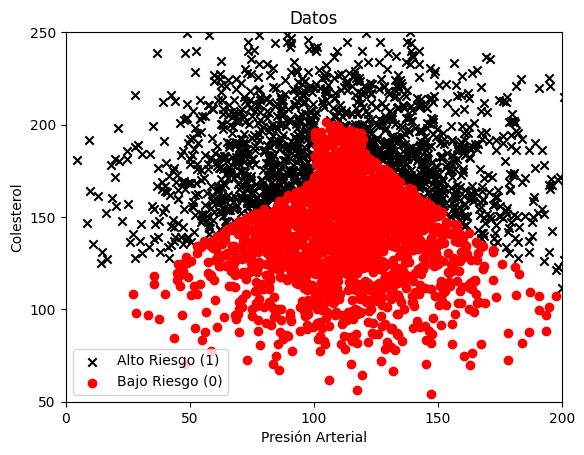

In [265]:
plot_data(x1, x2, y, "Presión Arterial", "Colesterol", "Datos")

### 2. Divide el conjunto de datos en entrenamiento y evaluación como consideres.

In [266]:
# Juntamos los datos para su normalización
x = np.array([x1, x2]).T

# Por conveniencia, normalizamos los datos entre 0 y 1. La normalización es un paso importante para el entrenamiento de la red neuronal ya que
# permite que la red no se vea afectada por los valores absolutos de las variables, sino por su relación entre ellas.
scaler = MinMaxScaler()

# Solo ajustamos los datos de entrada, no la clase
scaler.fit(x)
#scaled_x = scaler.transform(x)

# Realizamos la división de los datos en entrenamiento y test
# 80% de los datos para entrenamiento y 20% para test
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2)

### 3. Entrena una red neuronal con el conjunto de entrenamiento.

In [267]:
modelo = MLPClassifier(
    hidden_layer_sizes=(100), # Montamos una red neuronal con una capa oculta de 100 neuronas
    max_iter=5000,
    random_state=42,
    activation='relu',
    solver='lbfgs',
    learning_rate_init=0.1, # Tasa de aprendizaje inicial básica
    alpha=0.0001) # con Regularización L2

# Ajustamos el modelo a los datos de entrenamiento
modelo.fit(scaler.transform(xTrain), yTrain)

MLPClassifier(hidden_layer_sizes=100, learning_rate_init=0.1, max_iter=5000,
              random_state=42, solver='lbfgs')

### 4. Aplica el modelo entrenado sobre el conjunto de evaluación

In [268]:
# Realizamos la predicción de los datos de test
predicciones = modelo.predict(scaler.transform(xTest))
predicciones

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,

### 5. Muestra los resultados aplicados sobre el conjunto de evaluación. Se puede mostrar una gráfica como la anterior: puntos (presión arterial y colesterol) y su clasificación con MLP pintado de diversa manera (e.g. “x” o círculos).

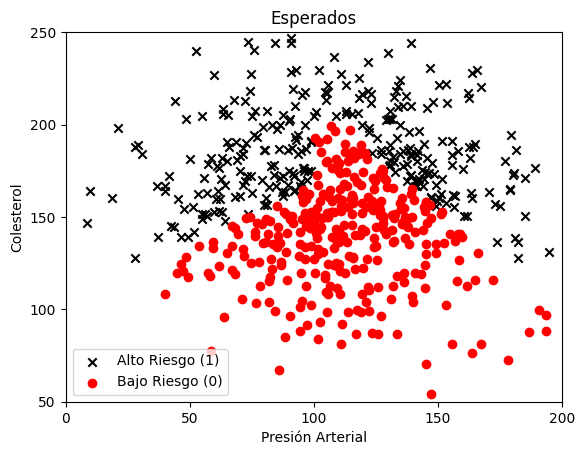

In [269]:
plot_data(xTest[:, 0], xTest[:, 1], yTest, "Presión Arterial", "Colesterol", "Esperados")

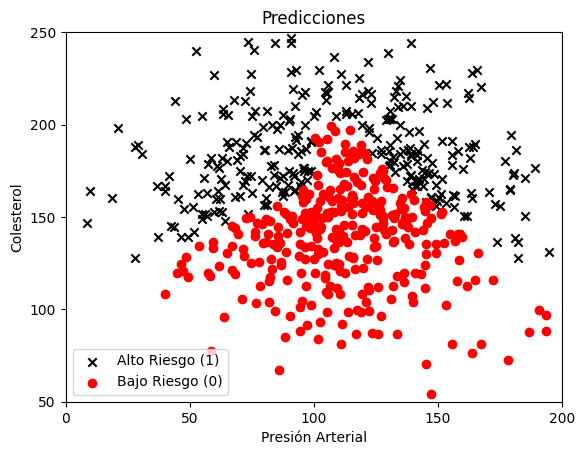

In [270]:
plot_data(xTest[:, 0], xTest[:, 1], predicciones, "Presión Arterial", "Colesterol", "Predicciones")

Visualmente, observamos muchísima similaridad entre ambas gráficas

### 6. Usa las métricas precisión y recall estudiadas en clase para evaluar la clasificación

Usamos las herramientas de sklearn para el cálculo de la precisión y el recall

In [271]:
accuracy = precision_score(yTest, predicciones)
print(f"Accuracy: {accuracy:.2f}")

recall = recall_score(yTest, predicciones)
print(f"Recall: {recall:.2f}")

Accuracy: 0.99
Recall: 1.00


Observamos un ajuste del modelo a los datos prácticamente perfecto. Esto es señal de un sobreajuste del modelo a éstos, noción que suele ser problemática para los modelos de IA dado que se vuelven inflexibles a nuevos datos que no necesariamente se ajustan a ese modelo tan estricto generado.

### 7. Para evitar “overfitting” habría que entrenar y validar los datos con conjuntos diferentes y con configuraciones de la red distintas. Prueba a mejorar la precisión de la red neuronal cambiando algunos de sus parámetros que has aprendido y haciendo distintas particiones del dataset. Se deben probar al menos dos configuraciones distintas.

Los efectos que hemos observado con el juego de las capas de la red es el siguiente:

- Aprendizaje y regularización afectan a la totalidad de las neuronas de la red. Normalmente, dada la cantidad de neuronas usadas, los coeficientes suelen estar entre 0 y 1. En esos valores, afectan a las partes del todo (las neuronas), pero suele ser, como hiperparámetros, el segundo aspecto a optimizar.

- La gran varianza en la red, es el planteamiento de su estructura, es decir, sus capas. Hemos observado lo siguiente:
    - Cuantas más neuronas tiene una capa, mayor precisión acaba aportando respecto a la imagen actual difuminada que dicha capa tiene de los datos, con el riesgo de dar sobreajuste.
    - Cuantas más capas tiene la red, más imágenes difuminadas tiene para interpretar sobre los datos, lo que generaliza la visión de las clases, con el riesgo de infraajustar el modelo.
    - El ajuste de estos factores no es lineal, ni es fácilmente ajustable a ningún criterio inmediato.

- El tamaño de las particiones afecta en la precisión del modelo.
    - Si el tamaño de la partición de entrenamiento es grande, puede ocurrir dos cosas:
        - La partición de prueba sea lo suficientemente distinta a la de entrenamiento que la precisión sea muy baja.
        - Haya alta precisión, pero el modelo esté sobreajustado, puesto que la veracidad de la medida de precisión no será fiable por la escasez de datos.
    - Si el tamaño de la partición de entrenamiento es igual a la de prueba, tendremos más datos para validar mejor la precisión del modelo, pero con menos datos para entrenar, obviamente el modelo estará peor entrenado para la clasificación.

- Dada la naturaleza del `test_and_split` no podemos probar cómo de balanceadas están las particiones generadas.

In [272]:
modelos = []
muestras = []
layer = [(90,10), (70, 30)]
alphas :np.ndarray = [0.001, 0.25]
learning_rate :np.ndarray = [0.1, 0.25]
testSizes : np.ndarray = [0.33, 0.45]

for i in range(2) :
    xTr, xTs, yTr, yTs = train_test_split(x, y, test_size=testSizes[i])
    muestras.append((xTr, xTs, yTr, yTs))
    
    mlp = MLPClassifier(layer[i], alpha=alphas[i], learning_rate_init=learning_rate[i], max_iter=5000)
    mlp.fit(scaler.transform(xTr), yTr)
    
    modelos.append(mlp)

8. Calcula la precisión para cada una de las configuraciones realizadas en el punto anterior.
Dibuja también sus gráficas.

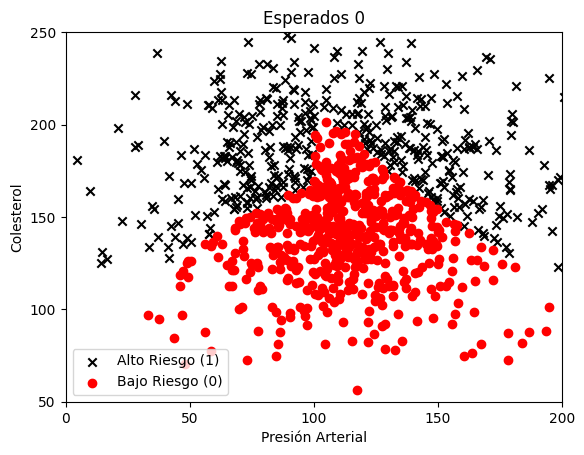

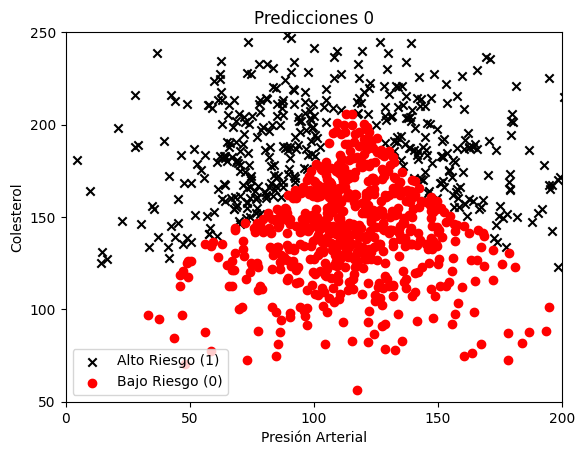

Accuracy: 0.97
Recall: 0.89


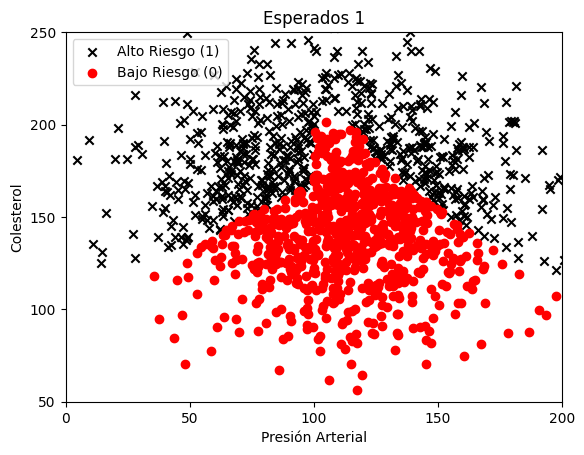

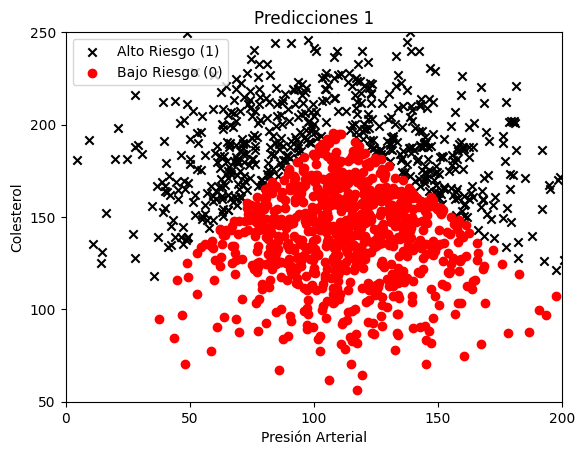

Accuracy: 0.98
Recall: 0.90


<Figure size 640x480 with 0 Axes>

In [273]:
for i in range(len(modelos)) :
    (xTr, xTs, yTr, yTs) = muestras[i]
    
    prediccion = modelos[i].predict(scaler.transform(xTs))
    
    plot_data(xTs[:, 0], xTs[:, 1], yTs, "Presión Arterial", "Colesterol", f"Esperados {i}")
    plt.show()
    plt.clf()
    
    plot_data(xTs[:, 0], xTs[:, 1], prediccion, "Presión Arterial", "Colesterol", f"Predicciones {i}")
    plt.show()
    plt.clf()
    
    accuracy = precision_score(yTs, prediccion)
    print(f"Accuracy: {accuracy:.2f}")

    recall = recall_score(yTs, prediccion)
    print(f"Recall: {recall:.2f}")

### 9. Discute los resultados y determina cuál es la mejor configuración de todas las estudiadas.

Observamos que la configuración 1 es la mejor configuración. Los motivos son porque ha conseguido maximizar las mediciones de precisión y recall por igual, planteando un modelo de clasificación alternativo a los datos sintéticos generados que resulta más general y flexible. Esto resulta interesante puesto que la idea de generar un modelo es clasificar nuevos datos ajenos al dataset con la incertidumbre de desconocer hasta que punto se ajustan al patrón de clasificación.